Видео лабораторной: https://youtu.be/dXR2V-_F3yg

TG: https://t.me/data_science_news



---



In [ ]:
%pip install scipy==1.7.2

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import norm
from scipy.stats import bootstrap
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.distributions.empirical_distribution import _conf_set

plt.rcParams['figure.figsize'] = [12, 8]

## Выборка (sample)

$X_1, X_2, ... , X_n$ $\sim$ $N(\mu, \sigma^2)$,

где

$n=\{100,1000\}$, $\mu=165$, $\sigma^2=100$

In [ ]:
mu=165
sigma=10
rv_norm = norm(mu, sigma)

Text(0.5, 0, 'Normal RV  $\\mu=165, \\sigma^2=100$')

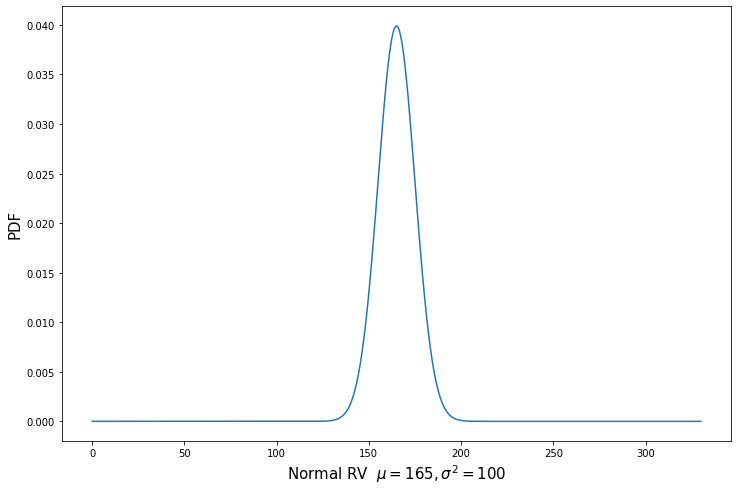

In [ ]:
x = np.linspace(0,330,1000)
plt.plot(x,rv_norm.pdf(x))
plt.ylabel('PDF', fontsize = 15)
plt.xlabel('Normal RV  ' + r'$\mu=165, \sigma^2=100$', fontsize = 15)

Text(0.5, 0, 'Normal RV  $\\mu=165, \\sigma^2=100$')

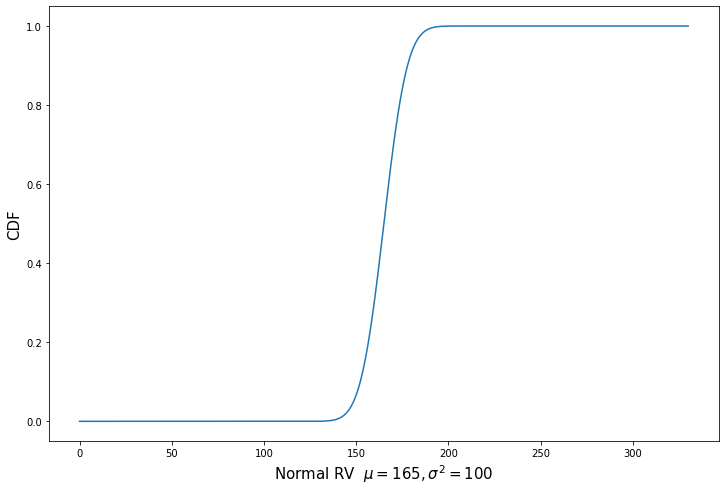

In [ ]:
plt.plot(x,rv_norm.cdf(x))
plt.ylabel('CDF', fontsize = 15)
plt.xlabel('Normal RV  ' + r'$\mu=165, \sigma^2=100$',  fontsize = 15)

Text(0.5, 0, 'Normal RV sample (N=100)')

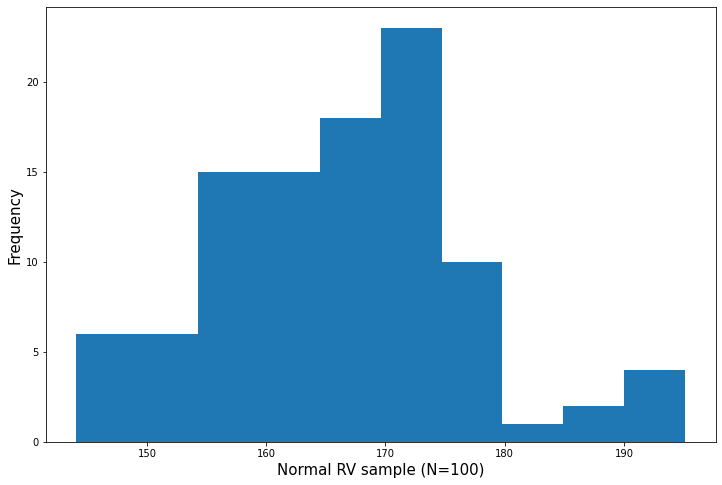

In [ ]:
sample_100 = rv_norm.rvs(100)
plt.hist(sample_100, bins=10)
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('Normal RV sample (N=100)', fontsize = 15)

Text(0.5, 0, 'Normal RV sample (N=1000)')

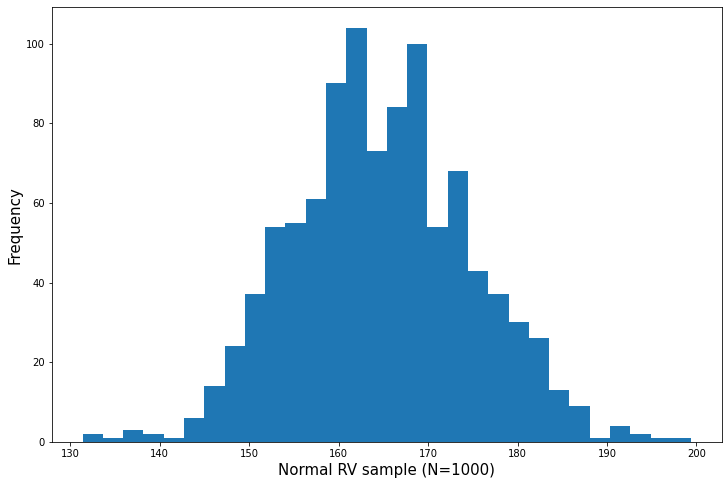

In [ ]:
sample_1000 = rv_norm.rvs(1000)
plt.hist(sample_1000, bins=30)
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('Normal RV sample (N=1000)', fontsize = 15)

## ECDF

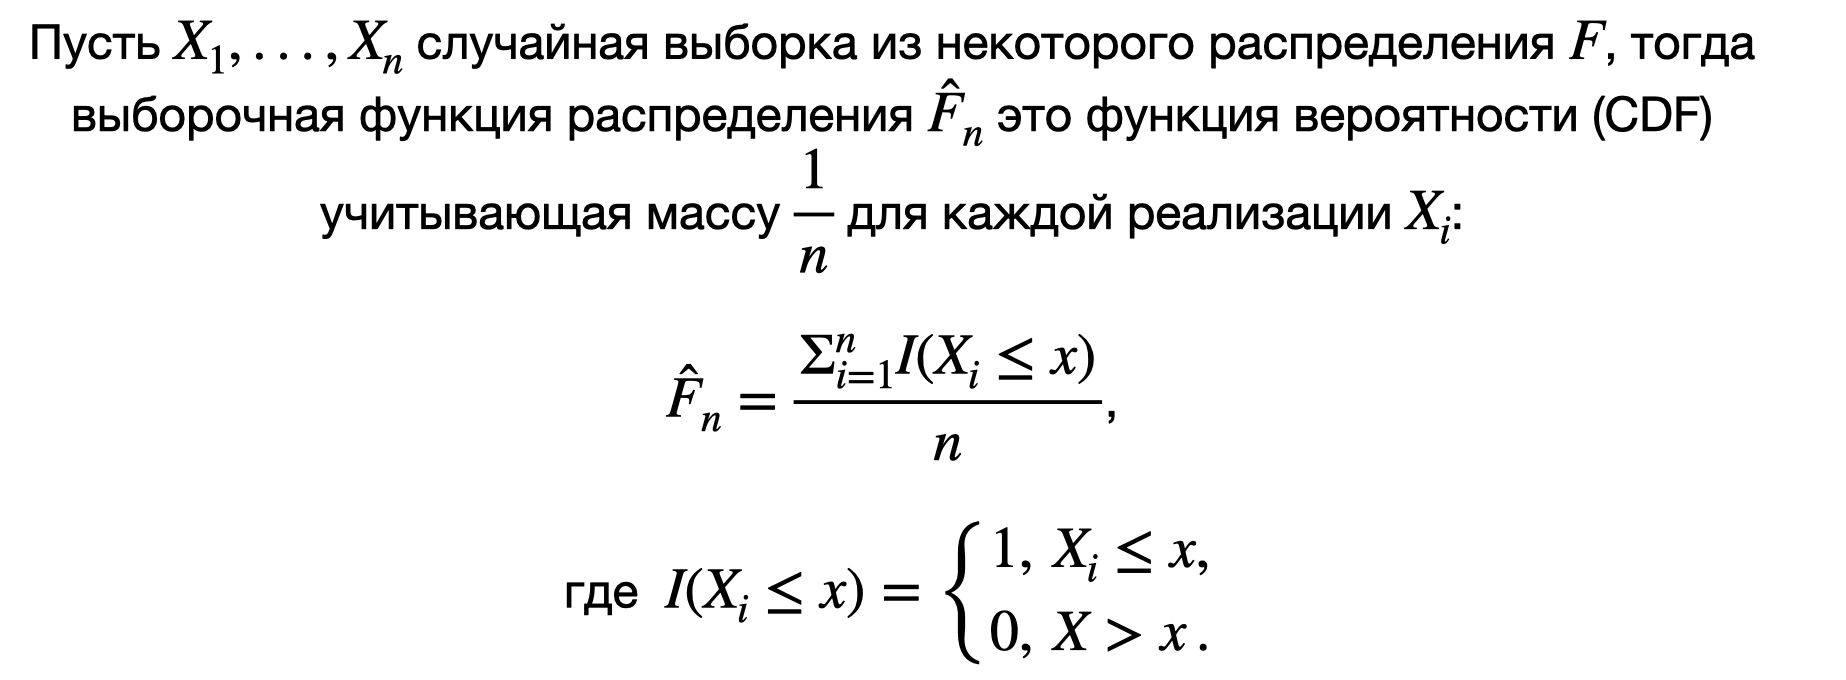

In [ ]:
def ecdf_castom(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

Text(0.5, 0, 'Normal RV sample (N=100)')

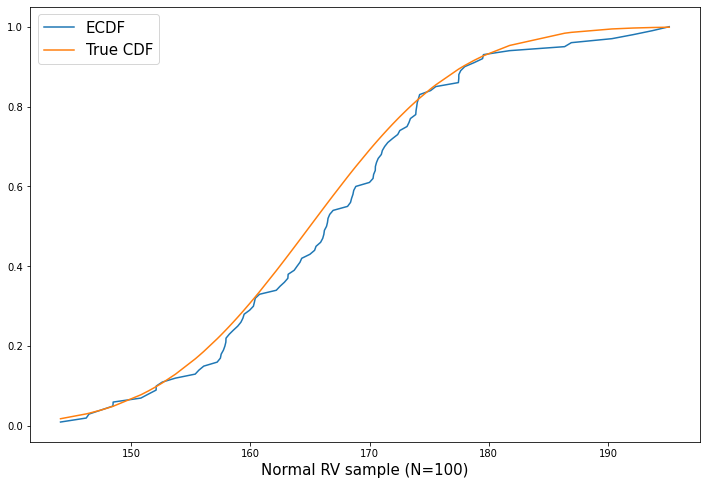

In [ ]:
x_castom, y_castom = ecdf_castom(sample_100)
plt.plot(x_castom, y_castom, label='ECDF')
plt.plot(x_castom, rv_norm.cdf(x_castom), label='True CDF')
plt.legend(fontsize=15)
plt.xlabel('Normal RV sample (N=100)', fontsize = 15)

In [ ]:
 #from statsmodels.distributions.empirical_distribution import ECDF

Код здесь: https://www.statsmodels.org/dev/_modules/statsmodels/distributions/empirical_distribution.html

In [ ]:
ecdf = ECDF(sample_100)

Text(0.5, 0, 'Normal RV sample (N=100)')

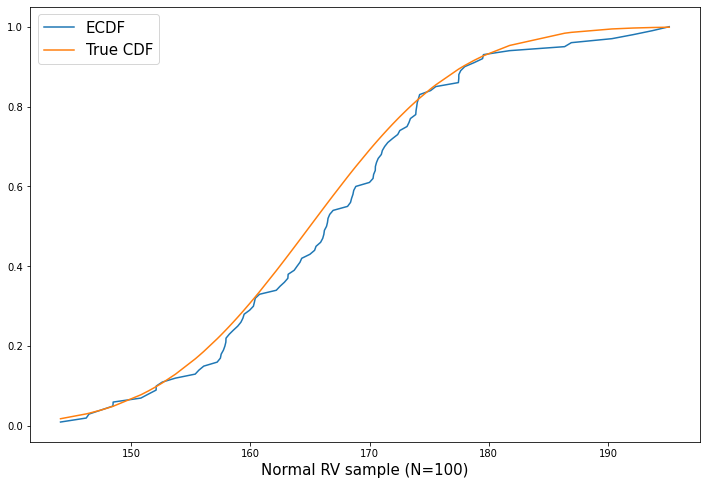

In [ ]:
y_sm_ecdf = ecdf(sample_100)
plt.plot(np.sort(sample_100), np.sort(y_sm_ecdf), label='ECDF')
plt.plot(np.sort(sample_100), rv_norm.cdf(np.sort(sample_100)), label='True CDF')
plt.legend(fontsize=15)
plt.xlabel('Normal RV sample (N=100)', fontsize = 15)

Text(0.5, 0, 'Normal RV sample (N=1000)')

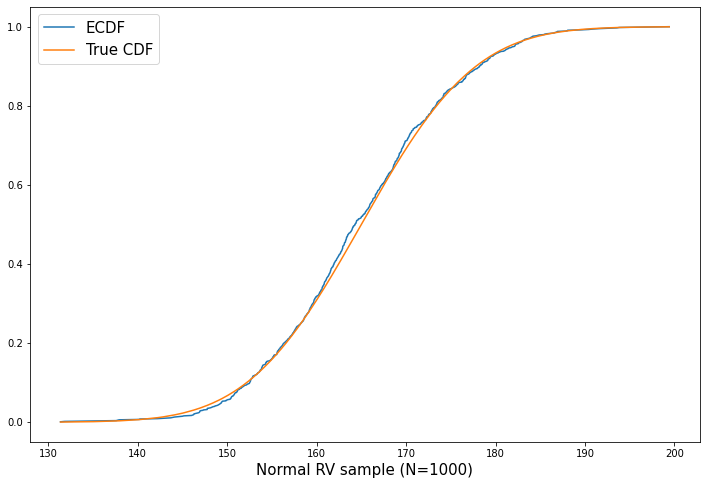

In [ ]:
ecdf_1000 = ECDF(sample_1000)
y_sm_ecdf_1000 = ecdf_1000(sample_1000)
plt.plot(np.sort(sample_1000), np.sort(y_sm_ecdf_1000), label='ECDF')
plt.plot(np.sort(sample_1000), rv_norm.cdf(np.sort(sample_1000)), label='True CDF')
plt.legend(fontsize=15)
plt.xlabel('Normal RV sample (N=1000)', fontsize = 15)

### ECDF Confidence band

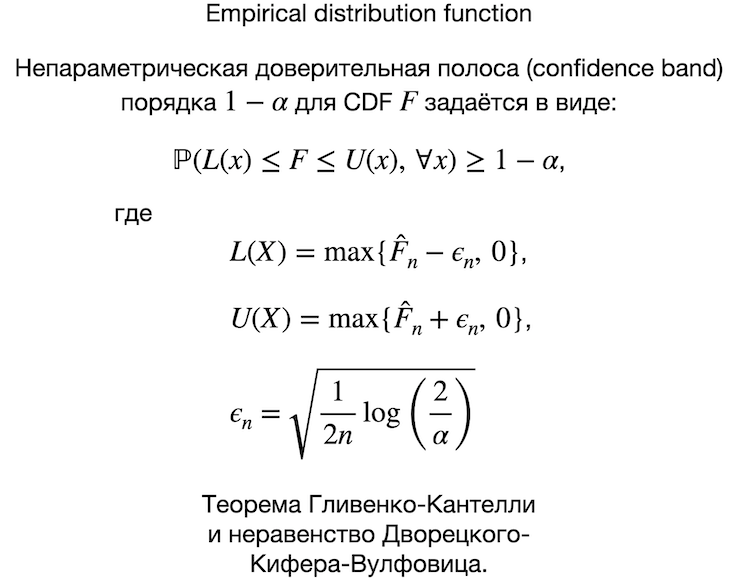

In [ ]:
alpha = 0.05
low_band, up_band = _conf_set(y_sm_ecdf , alpha=alpha)

Text(0.5, 0, 'Normal RV sample (N=100)')

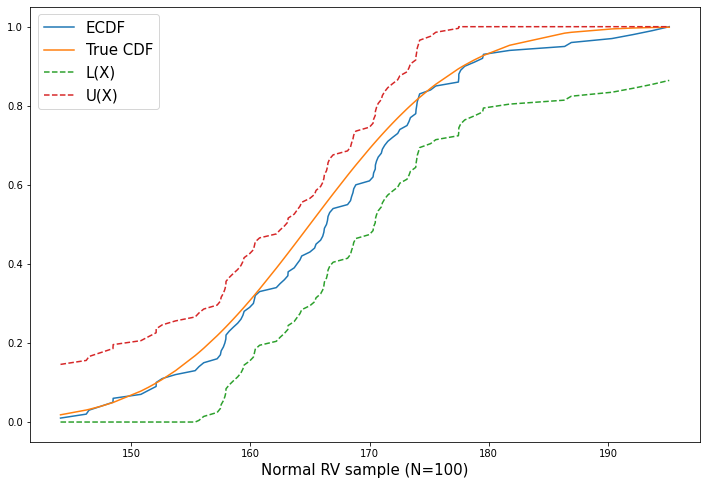

In [ ]:
plt.plot(np.sort(sample_100), np.sort(y_sm_ecdf), label='ECDF')
plt.plot(np.sort(sample_100), rv_norm.cdf(np.sort(sample_100)), label='True CDF')
plt.plot(np.sort(sample_100), np.sort(low_band), "--", label='L(X)')
plt.plot(np.sort(sample_100), np.sort(up_band), "--", label='U(X)')
plt.legend(fontsize=15)
plt.xlabel('Normal RV sample (N=100)', fontsize = 15)

Text(0.5, 0, 'Normal RV sample (N=1000)')

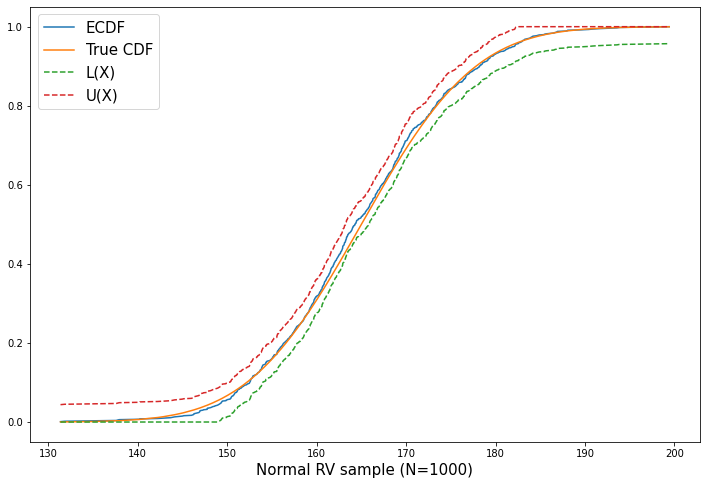

In [ ]:
alpha = 0.05
low_band_1000, up_band_1000 = _conf_set(y_sm_ecdf_1000 , alpha=alpha)
plt.plot(np.sort(sample_1000), np.sort(y_sm_ecdf_1000), label='ECDF')
plt.plot(np.sort(sample_1000), rv_norm.cdf(np.sort(sample_1000)), label='True CDF')
plt.plot(np.sort(sample_1000), np.sort(low_band_1000), "--", label='L(X)')
plt.plot(np.sort(sample_1000), np.sort(up_band_1000), "--", label='U(X)')
plt.legend(fontsize=15)
plt.xlabel('Normal RV sample (N=1000)', fontsize = 15)

# Оценка параметров методом bootstrap

**Процедура оценки простых парамтеров:**

1. Симуляция выборки $X_1^*,...,X_n^* \sim \hat{F}$
2. Вычисление парамтера для оценки (среднее, медиана, ...) $T_n=g(X_1^*,...,X_n^*)$

**Процедура оценки дисперсии:**

1. Симуляция выборки $X_1^*,...,X_n^* \sim \hat{F}$
2. Вычисление парамтера для оценки (среднее) $T_n=g(X_1^*,...,X_n^*)=\bar{X}_n$
3. Повтор шагов 1 и 2 $B$ раз для получения $T^*_{n,1},...,T^*_{n,B}$.
4. $\hat{\sigma}^2=\frac{1}{B}\Sigma_{b=1}^B(T^*_{n,b} - \frac{1}{B} \Sigma_{r=1}^BT^*_{n,r})$

**Оценка доверительных интервалов для параметров**

1. Симуляция оценок $B$ раз: $\hat{\theta}^*_{n,1},...,\hat{\theta}^*_{n,B}$
4. Оценка доверительного интервала для парамтеров, полученных симуляцией (метод перцентилей, метод опорных точек, BCa, нормальная апроксимация)

Доверительный интервал методом перцентилей: $[\hat{\theta}^*_{\frac{\alpha}{2}};\hat{\theta}^*_{1-\frac{\alpha}{2}}]$, где $1-\frac{\alpha}{2}$ это перцентиль симулированных параметров $\hat{\theta}^*_{n,1},...,\hat{\theta}^*_{n,B}$



Ссылки:
1. Wasserman, L. (2013). All of statistics: a concise course in statistical inference. Springer Science & Business Media. (с. 107-118)
2. Bootstrapping (statistics), Wikipedia, https://en.wikipedia.org/wiki/Bootstrapping_(statistics)
2. Nathaniel E. Helwig, “Bootstrap Confidence Intervals”, http://users.stat.umn.edu/~helwig/notes/bootci-Notes.pdf


In [ ]:
# from scipy.stats import bootstrap

Документация: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html

In [ ]:
data = (sample_100,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.95, method='percentile')
print("True mean {}".format(mu))
print("BootStrap {}".format(res.confidence_interval))
print("BootStrap std {}".format(res.standard_error))

True mean 165
BootStrap ConfidenceInterval(low=164.51727954978963, high=168.65333797059236)
BootStrap std 1.0474988112294426


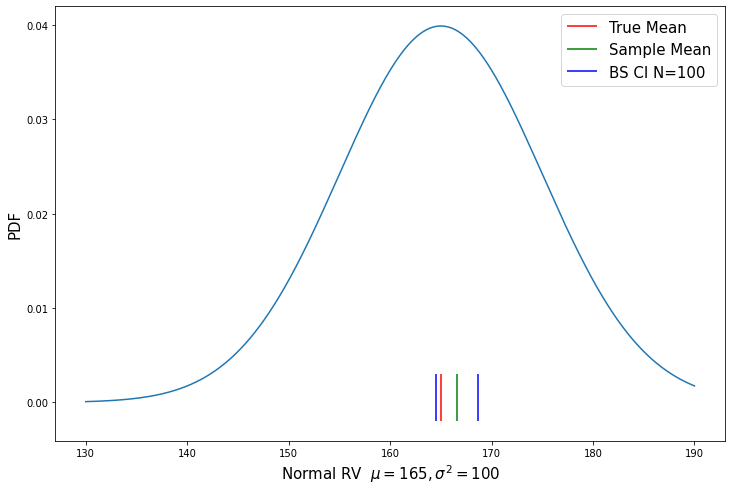

In [ ]:
x = np.linspace(130,190,1000)
plt.plot(x,rv_norm.pdf(x))
plt.vlines(mu,-0.002,+0.003, 'r', label="True Mean")
plt.vlines(sample_100.mean(),-0.002,+0.003, 'g', label="Sample Mean")
plt.vlines([res.confidence_interval[0],res.confidence_interval[1]],-0.002,+0.003, 'b', label="BS CI N=100")
plt.ylabel('PDF', fontsize = 15)
plt.xlabel('Normal RV  ' + r'$\mu=165, \sigma^2=100$', fontsize = 15)
plt.legend(fontsize=15)

In [ ]:
data = (sample_100,)  # samples must be in a sequence
res = bootstrap(data, np.std, confidence_level=0.95, method='percentile')
print("True mean {}".format(sigma))
print("BootStrap {}".format(res.confidence_interval))
print("BootStrap std {}".format(res.standard_error))

True mean 10
BootStrap ConfidenceInterval(low=8.880254367714764, high=11.900051220049807)
BootStrap std 0.7680563252691296


In [ ]:
data = (sample_1000,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.95, method='percentile')
print("True mean {}".format(mu))
print("BootStrap {}".format(res.confidence_interval))
print("BootStrap std {}".format(res.standard_error))

True mean 165
BootStrap ConfidenceInterval(low=164.28162850456386, high=165.52840176072357)
BootStrap std 0.3142622979186211


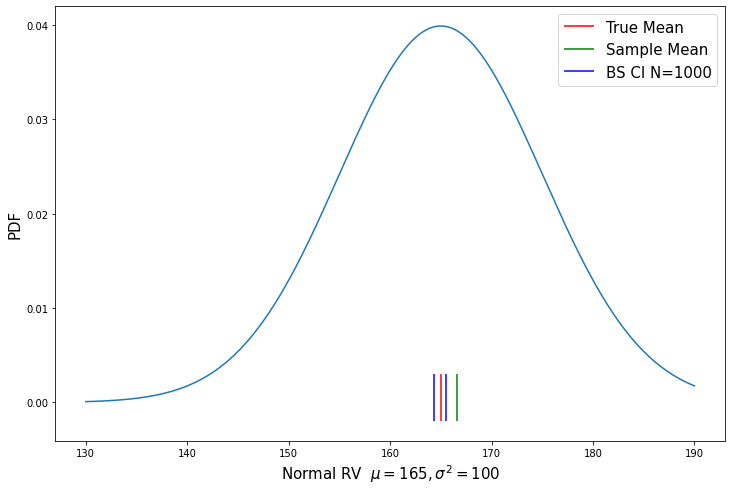

In [ ]:
x = np.linspace(130,190,1000)
plt.plot(x,rv_norm.pdf(x))
plt.vlines(mu,-0.002,+0.003, 'r', label="True Mean")
plt.vlines(sample_100.mean(),-0.002,+0.003, 'g', label="Sample Mean")
plt.vlines([res.confidence_interval[0],res.confidence_interval[1]],-0.002,+0.003, 'b', label="BS CI N=1000")
plt.ylabel('PDF', fontsize = 15)
plt.xlabel('Normal RV  ' + r'$\mu=165, \sigma^2=100$', fontsize = 15)
plt.legend(fontsize=15)

In [ ]:
res = bootstrap(data, np.std, confidence_level=0.95, method='percentile')
print("True mean {}".format(sigma))
print("BootStrap {}".format(res.confidence_interval))
print("BootStrap std {}".format(res.standard_error))

True mean 10
BootStrap ConfidenceInterval(low=9.489852255783713, high=10.375707228913466)
BootStrap std 0.22738654953068388


### Оценка медианы

In [ ]:
data = (sample_100,)  # samples must be in a sequence
res = bootstrap(data, np.median, confidence_level=0.95, method='percentile')
print("True median {}".format(mu))
print("BootStrap {}".format(res.confidence_interval))
print("BootStrap std {}".format(res.standard_error))

True median 165
BootStrap ConfidenceInterval(low=164.11640652382744, high=169.4211614872994)
BootStrap std 1.258299017826118


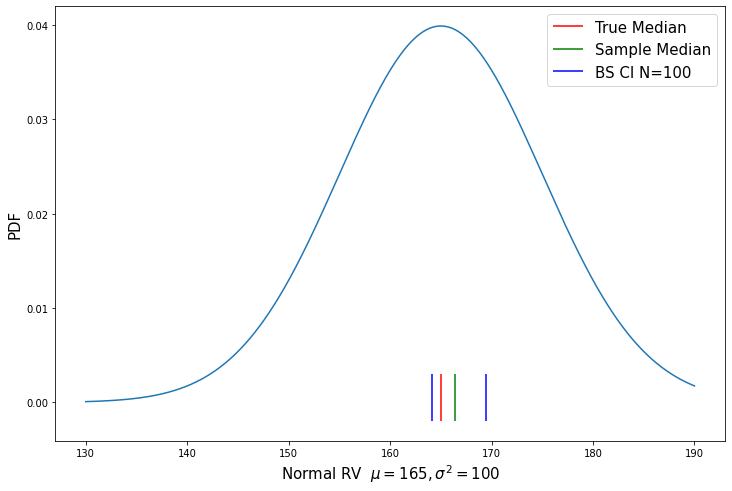

In [ ]:
x = np.linspace(130,190,1000)
plt.plot(x,rv_norm.pdf(x))
plt.vlines(mu,-0.002,+0.003, 'r', label="True Median")
plt.vlines(np.median(sample_100),-0.002,+0.003, 'g', label="Sample Median")
plt.vlines([res.confidence_interval[0],res.confidence_interval[1]],-0.002,+0.003, 'b', label="BS CI N=100")
plt.ylabel('PDF', fontsize = 15)
plt.xlabel('Normal RV  ' + r'$\mu=165, \sigma^2=100$', fontsize = 15)
plt.legend(fontsize=15)

In [ ]:
data = (sample_1000,)  # samples must be in a sequence
res = bootstrap(data, np.median, confidence_level=0.95, method='percentile')
print("True median {}".format(mu))
print("BootStrap {}".format(res.confidence_interval))
print("BootStrap std {}".format(res.standard_error))

True median 165
BootStrap ConfidenceInterval(low=163.43327011752865, high=165.47084561800636)
BootStrap std 0.5080328092857433


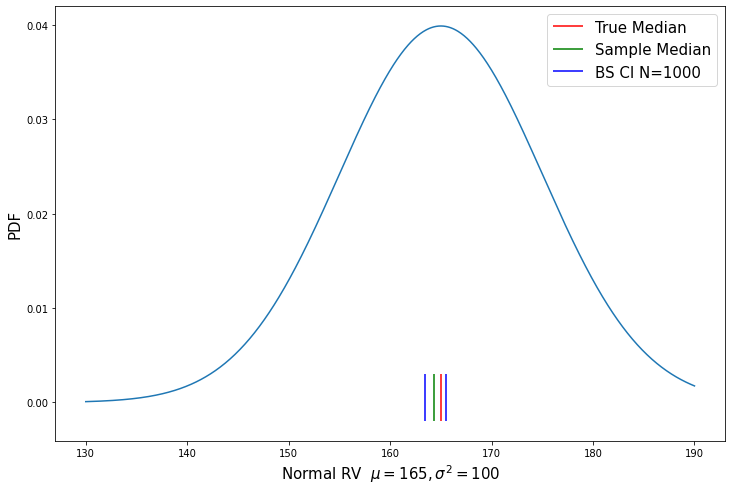

In [ ]:
x = np.linspace(130,190,1000)
plt.plot(x,rv_norm.pdf(x))
plt.vlines(mu,-0.002,+0.003, 'r', label="True Median")
plt.vlines(np.median(sample_1000),-0.002,+0.003, 'g', label="Sample Median")
plt.vlines([res.confidence_interval[0],res.confidence_interval[1]],-0.002,+0.003, 'b', label="BS CI N=1000")
plt.ylabel('PDF', fontsize = 15)
plt.xlabel('Normal RV  ' + r'$\mu=165, \sigma^2=100$', fontsize = 15)
plt.legend(fontsize=15)